In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os  
from matplotlib.ticker import PercentFormatter
from scipy.optimize import curve_fit


# plot cpu, gpu power pattern for GPGPU apps
def plot_power_CPU_GPU(cpu_filename, gpu_filename, benchmark):
    # Load the CSV files into DataFrames
    cpu_data = pd.read_csv(cpu_filename)
    gpu_data = pd.read_csv(gpu_filename)

    # Plot the data
    plt.figure(figsize=(4, 3))
    plt.plot(cpu_data['Time (s)'], cpu_data['Package Power (W)'], label='RAPL Package Power')
    plt.plot(gpu_data['Time (s)'], gpu_data['GPU 0 Power (W)'], label='GPU Power')
    plt.xlabel('Time (s)')
    plt.ylabel('Power (W)')
    plt.title(f'Power Consumption ({benchmark})', pad=40)
    # Position the legend outside the plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
    plt.grid(True, axis="y", alpha=0.5)
    
    # Make sure the ./fig directory exists, if not, create it
    # os.makedirs('./fig', exist_ok=True)
    # # Save the figure
    # plt.savefig(f'./fig/power_cpu_gpu_{benchmark}.jpg', bbox_inches='tight')
    # plt.show()


def plot_uncore_freq(uncore_file):
    file_path = uncore_file  
    data = pd.read_csv(file_path)
    
    # Plot Core 0 and Core 1 Uncore Frequencies over Time
    plt.figure(figsize=(4, 3))
    
    # Plot Core 0 Uncore Frequency
    plt.plot(data['Time (s)'], data['Core 0 Uncore Frequency (GHz)'], label='Core 0 Uncore Frequency (GHz)')
    
    # Plot Core 1 Uncore Frequency
    plt.plot(data['Time (s)'], data['Core 1 Uncore Frequency (GHz)'], label='Core 1 Uncore Frequency (GHz)')
    
    # Adding labels and title
    plt.xlabel('Time (s)')
    plt.ylabel('Uncore Frequency (GHz)')
    plt.title('Uncore Frequency of resetnet50 training')
    plt.legend()
    
    # Show the plot
    plt.show()


In [34]:
resnet50_cpu = "./resnet50/uncore_freq_baseline/resnet50_power_cpu.csv" 
resnet50_gpu = "./resnet50/uncore_freq_baseline/resnet50_power_gpu.csv" 
resnet50_uncore = "./resnet50/uncore_freq_baseline/resnet50_uncore_freq.csv" 

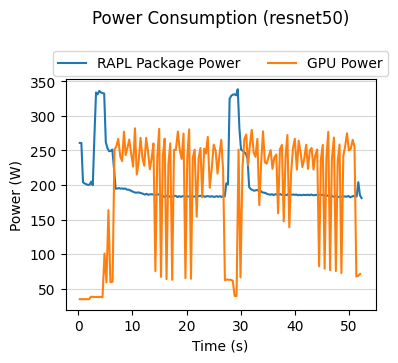

In [35]:
plot_power_CPU_GPU(resnet50_cpu,resnet50_gpu,"resnet50")

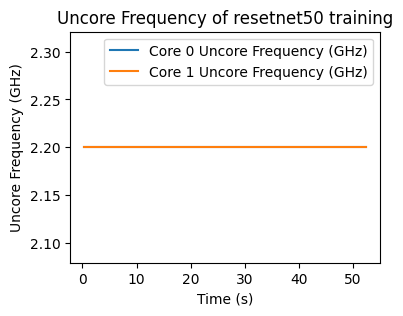

In [36]:
plot_uncore_freq(resnet50_uncore)